## Part A

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\enggt\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\enggt\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\enggt\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


**Loading Customer Preference Dataframe**

In [2]:
pref_df = pd.read_csv("C:/Users/enggt/OneDrive/Desktop/MCAN/MCAN 1/Assignment 1/mugs-preference-parameters-full.csv")

In [3]:
demo_df = pd.read_excel("C:/Users/enggt/OneDrive/Desktop/MCAN/MCAN 2/Assignment 2/demographics-full.xlsx")

In [4]:
pref_df.head()

,Cust,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,...,pCnLk,pBrA,pBrB,pBrC,IPr,Iin,ICp,ICl,Icn,IBr
0,1,1,3,7,1,3,7,1,7,6,...,7,7,5,1,5,8,32,7,34,14
1,2,1,6,7,1,4,7,1,7,6,...,7,7,5,1,6,3,17,10,51,15
2,3,1,6,7,1,4,7,7,4,1,...,7,1,3,7,55,5,5,8,16,9
3,4,1,6,7,1,4,7,7,1,3,...,7,7,1,5,12,9,3,40,20,16
4,5,1,4,7,1,4,7,1,7,2,...,7,3,1,7,56,6,19,9,0,11


In [5]:
pref_df.columns

Index(['Cust', 'pPr30', 'pPr10', 'pPr05', 'pIn0.5', 'pIn1', 'pIn3', 'pCp12',
       'pCp20', 'pCp32', 'pClD', 'pClF', 'pClE', 'pCnSl', 'pCnSp', 'pCnLk',
       'pBrA', 'pBrB', 'pBrC', 'IPr', 'Iin', 'ICp', 'ICl', 'Icn', 'IBr'],
      dtype='object')

In [6]:
demo_df.head()

,id,income,age,sports,gradschl
0,1,63,46,0,0
1,2,65,48,0,0
2,3,38,37,0,0
3,4,77,58,1,1
4,5,44,41,0,0


In [7]:
# Renaming 'id' column to 'Cust'
demo_df.rename(columns={'id': 'Cust'}, inplace=True)

In [8]:
demo_df.head()

,Cust,income,age,sports,gradschl
0,1,63,46,0,0
1,2,65,48,0,0
2,3,38,37,0,0
3,4,77,58,1,1
4,5,44,41,0,0


In [9]:
# Merging demo_df and pref_df on 'Cust'
merged_df = pd.merge(demo_df, pref_df, on='Cust')
merged_df

,Cust,income,age,sports,gradschl,pPr30,pPr10,pPr05,pIn0.5,pIn1,...,pCnLk,pBrA,pBrB,pBrC,IPr,Iin,ICp,ICl,Icn,IBr
0,1,63,46,0,0,1,3,7,1,3,...,7,7,5,1,5,8,32,7,34,14
1,2,65,48,0,0,1,6,7,1,4,...,7,7,5,1,6,3,17,10,51,15
2,3,38,37,0,0,1,6,7,1,4,...,7,1,3,7,55,5,5,8,16,9
3,4,77,58,1,1,1,6,7,1,4,...,7,7,1,5,12,9,3,40,20,16
4,5,44,41,0,0,1,4,7,1,4,...,7,3,1,7,56,6,19,9,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,307,44,40,0,0,1,3,7,1,6,...,7,4,1,7,54,13,6,10,7,10
307,308,67,51,1,1,1,3,7,1,6,...,7,7,1,4,8,24,4,39,15,11
308,309,56,43,1,0,1,6,7,1,5,...,7,7,3,1,12,34,16,14,13,11
309,310,39,39,0,0,1,3,7,1,5,...,7,1,5,7,57,5,5,17,5,10


**Creating weighted preference matrics by multiplying all the importance factor for the attributes recorded.**

In [10]:
import pandas as pd

# Assuming pref_df_new is your DataFrame
# If not, replace it with the actual name of your DataFrame

# Extract relevant columns
weights_columns = ['IPr', 'Iin', 'ICp', 'ICl', 'Icn','IBr']
attribute_columns = [['pPr30', 'pPr10', 'pPr05'], ['pIn0.5', 'pIn1', 'pIn3'], ['pCp12', 'pCp20', 'pCp32'], ['pClD', 'pClF', 'pClE'], ['pCnSl', 'pCnSp', 'pCnLk'],['pBrA', 'pBrB', 'pBrC']]

# Initialize the pref_df_weights DataFrame
pref_df_weights = pd.DataFrame()

# Perform the specified actions and save the values in pref_df_weights
for weight_col, attribute_cols in zip(weights_columns, attribute_columns):
    for attribute_col in attribute_cols:
        pref_df_weights[f'{weight_col}*{attribute_col}'] = merged_df[weight_col] * merged_df[attribute_col]

# Display the result or save it to a file if needed
pref_df_weights

,IPr*pPr30,IPr*pPr10,IPr*pPr05,Iin*pIn0.5,Iin*pIn1,Iin*pIn3,ICp*pCp12,ICp*pCp20,ICp*pCp32,ICl*pClD,ICl*pClF,ICl*pClE,Icn*pCnSl,Icn*pCnSp,Icn*pCnLk,IBr*pBrA,IBr*pBrB,IBr*pBrC
0,5,15,35,8,24,56,32,224,192,7,14,49,34,170,238,98,70,14
1,6,36,42,3,12,21,17,119,102,10,60,70,51,357,357,105,75,15
2,55,330,385,5,20,35,35,20,5,8,24,56,16,80,112,9,27,63
3,12,72,84,9,36,63,21,3,9,40,200,280,20,100,140,112,16,80
4,56,224,392,6,24,42,19,133,38,9,27,63,0,0,0,33,11,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,54,162,378,13,78,91,6,42,36,10,70,70,7,35,49,40,10,70
307,8,24,56,24,144,168,4,28,24,39,234,273,15,30,105,77,11,44
308,12,72,84,34,170,238,16,112,48,14,28,98,13,39,91,77,33,11
309,57,171,399,5,25,35,5,35,5,17,68,119,5,20,35,10,50,70


**Creating Dataframe from the Given Product Candidate Data** 

In [11]:
# Define the data
data = {
    "Price": ["$30", "$10", "$30"],
    "Time": ["3 hrs","1 hrs","3 hrs"],
    "Capacity": ["20 oz", "20 oz", "20 oz"],
    "Cleanability": ["Easy", "Fair", "Easy"],
    "Containment": ["Leak resistant", "Spill resistant", "Leak resistant"],
    "Brand": ["A", "B", "C"]
}

# Create the DataFrame
product_df = pd.DataFrame(data)

# Display the DataFrame
product_df

,Price,Time,Capacity,Cleanability,Containment,Brand
0,$30,3 hrs,20 oz,Easy,Leak resistant,A
1,$10,1 hrs,20 oz,Fair,Spill resistant,B
2,$30,3 hrs,20 oz,Easy,Leak resistant,C


In [12]:
product_df.shape

(3, 6)

**Creating Dummy for Matrix Multiplication** 

In [13]:
one_hot_encoded_df = pd.get_dummies(product_df)

one_hot_encoded_df.head()

,Price_$10,Price_$30,Time_1 hrs,Time_3 hrs,Capacity_20 oz,Cleanability_Easy,Cleanability_Fair,Containment_Leak resistant,Containment_Spill resistant,Brand_A,Brand_B,Brand_C
0,0,1,0,1,1,1,0,1,0,1,0,0
1,1,0,1,0,1,0,1,0,1,0,1,0
2,0,1,0,1,1,1,0,1,0,0,0,1


In [14]:
one_hot_encoded_df.columns

Index(['Price_$10', 'Price_$30', 'Time_1 hrs', 'Time_3 hrs', 'Capacity_20 oz',
       'Cleanability_Easy', 'Cleanability_Fair', 'Containment_Leak resistant',
       'Containment_Spill resistant', 'Brand_A', 'Brand_B', 'Brand_C'],
      dtype='object')

**Resetting the Column order to match the order of Preference Dataframe**

In [15]:
#Define the desired order of columns

column_order = ['Price_$30','Price_$10','Price_$5',
                 'Time_0.5 hrs', 'Time_1 hrs', 'Time_3 hrs',
                 'Capacity_12 oz', 'Capacity_20 oz', 'Capacity_32 oz',
                 'Cleanability_Difficult', 'Cleanability_Fair','Cleanability_Easy',
                 'Containment_Slosh resistant', 'Containment_Spill resistant','Containment_Leak resistant','Brand_A', 'Brand_B', 'Brand_C']


In [16]:
# Find the columns in column_order that are not in one_hot_encoded_df
missing_columns = [col for col in column_order if col not in one_hot_encoded_df.columns]

# Print the missing columns
missing_columns

['Price_$5',
 'Time_0.5 hrs',
 'Capacity_12 oz',
 'Capacity_32 oz',
 'Cleanability_Difficult',
 'Containment_Slosh resistant']

In [17]:
# Add the specified missing columns to one_hot_encoded_df and save it as one_hot_encoded_df_1

# Columns to add with all values set to 0
columns_to_add = ['Price_$5','Time_0.5 hrs','Capacity_12 oz','Capacity_32 oz','Cleanability_Difficult','Containment_Slosh resistant']

# Add each column with all values set to 0
for col in columns_to_add:
    one_hot_encoded_df[col] = 0

# Save the amended DataFrame as one_hot_encoded_df_1
one_hot_encoded_df_1 = one_hot_encoded_df

# Display the amended DataFrame
one_hot_encoded_df_1

,Price_$10,Price_$30,Time_1 hrs,Time_3 hrs,Capacity_20 oz,Cleanability_Easy,Cleanability_Fair,Containment_Leak resistant,Containment_Spill resistant,Brand_A,Brand_B,Brand_C,Price_$5,Time_0.5 hrs,Capacity_12 oz,Capacity_32 oz,Cleanability_Difficult,Containment_Slosh resistant
0,0,1,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0
1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0
2,0,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0


**Reordering column for matrics multiplication**

In [18]:
# Reorder the columns of one_hot_encoded_df_1
one_hot_encoded_df_ordered = one_hot_encoded_df_1[column_order]

# Display the reordered DataFrame
one_hot_encoded_df_ordered

,Price_$30,Price_$10,Price_$5,Time_0.5 hrs,Time_1 hrs,Time_3 hrs,Capacity_12 oz,Capacity_20 oz,Capacity_32 oz,Cleanability_Difficult,Cleanability_Fair,Cleanability_Easy,Containment_Slosh resistant,Containment_Spill resistant,Containment_Leak resistant,Brand_A,Brand_B,Brand_C
0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0
1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
2,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1


In [19]:
one_hot_encoded_df_ordered.shape

(3, 18)

In [20]:
prod_df = one_hot_encoded_df_ordered.copy()

In [21]:
prod_df.head()

,Price_$30,Price_$10,Price_$5,Time_0.5 hrs,Time_1 hrs,Time_3 hrs,Capacity_12 oz,Capacity_20 oz,Capacity_32 oz,Cleanability_Difficult,Cleanability_Fair,Cleanability_Easy,Containment_Slosh resistant,Containment_Spill resistant,Containment_Leak resistant,Brand_A,Brand_B,Brand_C
0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0
1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
2,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1


In [22]:
prod_df.shape

(3, 18)

**Calculating segmentations mean**

In [66]:
segment_df = pref_df_weights.copy()
segment_df['Cust'] = pref_df['Cust']
segment_df_1 = pd.merge(segment_df, demo_df, on='Cust')
segment_df_1 = segment_df_1.drop('Cust', axis=1)

In [65]:
# Columns to be added
columns_to_add = ['IPr', 'Iin', 'ICp', 'ICl', 'Icn', 'IBr']

# Copying 'segment_df_1' to 'segment_df_final'
segment_df_final = segment_df_1.copy()

# Adding columns from 'merged_df' to 'segment_df_final'
for column in columns_to_add:
    segment_df_final[column] = merged_df[column]

In [53]:
# Assuming prod_df, pref_df_weights, and merged_df are already defined in your environment

# Transpose prod_df
transposed_prod_df = prod_df.transpose()

# Matrix multiplication and sum
result_values = np.dot(pref_df_weights.values, transposed_prod_df.values)

# Create a new DataFrame with the calculated values
result_df = pd.DataFrame(result_values, columns=transposed_prod_df.columns)

# Define the constant C
C = 0.0139

# Multiply each cell with C and apply the logit function
result_df_logit = result_df * C
result_df_logit_exp = np.exp(result_df_logit)
result_df_sum = result_df_logit_exp.sum(axis=1)
result_df_normalized = result_df_logit_exp.div(result_df_sum, axis=0)

# Initialize a DataFrame to store the results without 'Cust' column
segment_means = pd.DataFrame()

# Calculate sumproduct for each column of result_df_normalized with each column of merged_df
for col in result_df_normalized.columns:
    for m_col in segment_df_final.columns:
        segment_means.at[col, m_col] = (result_df_normalized[col] * segment_df_final[m_col]).sum() / result_df_normalized[col].sum()

# Calculate overall mean for each column in merged_df
segment_means.loc['Overall Mean'] = segment_df_final.mean()

# Display the final DataFrame
segment_means

,IPr*pPr30,IPr*pPr10,IPr*pPr05,Iin*pIn0.5,Iin*pIn1,Iin*pIn3,ICp*pCp12,ICp*pCp20,ICp*pCp32,ICl*pClD,...,income,age,sports,gradschl,IPr,Iin,ICp,ICl,Icn,IBr
0,18.042101,92.440598,126.294705,13.357271,56.655584,93.500900,60.202617,92.902883,54.308334,18.474938,...,60.168849,46.711944,0.470805,0.359620,18.042101,13.357271,16.362322,18.474938,20.659395,13.117021
1,38.985193,220.582421,272.896354,8.963154,38.657456,62.742081,44.606073,68.052498,41.513944,14.565080,...,49.634303,42.848971,0.168093,0.247873,38.985193,8.963154,12.162438,14.565080,12.399438,12.891366
2,25.956316,130.129136,181.694209,11.138901,45.237124,77.972310,44.345185,68.433621,40.626979,21.131582,...,57.744594,46.474165,0.448355,0.448449,25.956316,11.138901,12.198223,21.131582,16.648434,12.966477
Overall Mean,29.125402,157.475884,203.877814,10.887460,45.935691,76.212219,49.369775,75.848875,45.247588,17.475884,...,54.996785,44.983923,0.334405,0.334405,29.125402,10.887460,13.472669,17.475884,16.057878,12.980707


**Calculating Loglift**

In [54]:
# Copy the segment_means DataFrame for loglift calculation
loglift_scores = segment_means.copy()

# Calculate loglift score for each segment
for col in segment_means.columns:
    for segment in segment_means.index[:-1]:  # Exclude 'Overall Mean' row
        loglift_scores.at[segment, col] = np.log10(segment_means.at[segment, col] / segment_means.at['Overall Mean', col])

# Remove the 'Overall Mean' row from the loglift scores DataFrame
loglift_scores_final = loglift_scores.drop('Overall Mean')

# Display the loglift scores DataFrame without the 'Overall Mean' row
loglift_scores_final

,IPr*pPr30,IPr*pPr10,IPr*pPr05,Iin*pIn0.5,Iin*pIn1,Iin*pIn3,ICp*pCp12,ICp*pCp20,ICp*pCp32,ICl*pClD,...,income,age,sports,gradschl,IPr,Iin,ICp,ICl,Icn,IBr
0,-0.207985,-0.231351,-0.207985,0.088791,0.091092,0.088791,0.086154,0.088080,0.079271,0.024144,...,0.039034,0.016371,0.148568,0.031571,-0.207985,0.088791,0.084391,0.024144,0.109429,0.004537
1,0.126628,0.146357,0.126628,-0.084466,-0.074917,-0.084466,-0.044067,-0.047105,-0.037401,-0.079126,...,-0.044555,-0.021117,-0.298723,-0.130045,0.126628,-0.084466,-0.044433,-0.079126,-0.112286,-0.002999
2,-0.050029,-0.082840,-0.050029,0.009916,-0.006655,0.009916,-0.046615,-0.044680,-0.046781,0.082493,...,0.021174,0.014154,0.127349,0.127440,-0.050029,0.009916,-0.043157,0.082493,0.015685,-0.000476


**Saving the Dataframe**

In [55]:
# Save the segment_means and loglift_scores_without_overall_mean DataFrames as CSV files

# Save segment_means DataFrame as CSV
segment_means.to_csv('product_segmentations_affinity_final.csv', index=True)

# Save loglift_scores_without_overall_mean DataFrame as CSV
loglift_scores_final.to_csv('loglift_scores_affinity_final.csv', index=True)

In [64]:
# Define thresholds
noteworthy_threshold = 0.04
very_noteworthy_threshold = 0.08

# Adjusted function to ensure that columns are not duplicated between noteworthy and very noteworthy categories
def find_distinct_noteworthy_columns(df):
    distinct_noteworthy_columns = {}
    for index, row in df.iterrows():
        # Noteworthy columns (greater than or equal to 0.04 and less than 0.08)
        noteworthy_cols = {col: row[col] for col in df.columns if noteworthy_threshold <= abs(row[col]) < very_noteworthy_threshold}
        # Very noteworthy columns (equal or greater than 0.08)
        very_noteworthy_cols = {col: row[col] for col in df.columns if abs(row[col]) >= very_noteworthy_threshold}
        distinct_noteworthy_columns[f'Segment {index + 1}'] = {'Noteworthy': noteworthy_cols, 'Very Noteworthy': very_noteworthy_cols}
    return distinct_noteworthy_columns

# Find distinct noteworthy and very noteworthy columns for each segment
distinct_noteworthy_columns_per_segment = find_distinct_noteworthy_columns(loglift_scores_final)

# Print distinct noteworthy and very noteworthy columns with scores for each segment
for segment, columns in distinct_noteworthy_columns_per_segment.items():
    print(f"{segment}:")
    print("Noteworthy columns:")
    for col, score in columns['Noteworthy'].items():
        print(f"  {col}: {score}")
    print("Very noteworthy columns:")
    for col, score in columns['Very Noteworthy'].items():
        print(f"  {col}: {score}")
    print()

Segment 1:
Noteworthy columns:
  ICp*pCp32: 0.07927104054098183
  IBr*pBrB: -0.05487562776728008
Very noteworthy columns:
  IPr*pPr30: -0.20798482475408553
  IPr*pPr10: -0.23135130789622257
  IPr*pPr05: -0.20798482475408545
  Iin*pIn0.5: 0.08879118703413166
  Iin*pIn1: 0.09109246556001593
  Iin*pIn3: 0.08879118703413182
  ICp*pCp12: 0.08615422124713161
  ICp*pCp20: 0.08808004972210477
  Icn*pCnSl: 0.10942945899483088
  Icn*pCnSp: 0.10380002220453166
  Icn*pCnLk: 0.10942945899483103
  IBr*pBrA: 0.1468476564458261
  IBr*pBrC: -0.1180615303331885
  sports: 0.14856848294107508
  IPr: -0.20798482475408553
  Iin: 0.08879118703413166
  ICp: 0.08439129646015826
  Icn: 0.10942945899483088

Segment 2:
Noteworthy columns:
  Iin*pIn1: -0.07491698887477911
  ICp*pCp12: -0.04406715469816719
  ICp*pCp20: -0.0471050715907288
  ICl*pClD: -0.07912628798016934
  ICl*pClF: -0.06331635441608309
  ICl*pClE: -0.0791262879801694
  IBr*pBrB: 0.06052220320091314
  income: -0.04455536964572126
  ICp: -0.04443298

--End of part A--

## Part B

### Classical Segmentation

In [28]:
# Create a new DataFrame to hold the weights_columns
new_df = pd.DataFrame()

# Copy the weights_columns from merged_df to new_df
for col in weights_columns:
    new_df[col] = merged_df[col]

# Combine pref_df_weights with new_df
classic_df = pd.concat([pref_df_weights, new_df], axis=1)

# Display the result or save it to a file if needed
classic_df


,IPr*pPr30,IPr*pPr10,IPr*pPr05,Iin*pIn0.5,Iin*pIn1,Iin*pIn3,ICp*pCp12,ICp*pCp20,ICp*pCp32,ICl*pClD,...,Icn*pCnLk,IBr*pBrA,IBr*pBrB,IBr*pBrC,IPr,Iin,ICp,ICl,Icn,IBr
0,5,15,35,8,24,56,32,224,192,7,...,238,98,70,14,5,8,32,7,34,14
1,6,36,42,3,12,21,17,119,102,10,...,357,105,75,15,6,3,17,10,51,15
2,55,330,385,5,20,35,35,20,5,8,...,112,9,27,63,55,5,5,8,16,9
3,12,72,84,9,36,63,21,3,9,40,...,140,112,16,80,12,9,3,40,20,16
4,56,224,392,6,24,42,19,133,38,9,...,0,33,11,77,56,6,19,9,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,54,162,378,13,78,91,6,42,36,10,...,49,40,10,70,54,13,6,10,7,10
307,8,24,56,24,144,168,4,28,24,39,...,105,77,11,44,8,24,4,39,15,11
308,12,72,84,34,170,238,16,112,48,14,...,91,77,33,11,12,34,16,14,13,11
309,57,171,399,5,25,35,5,35,5,17,...,35,10,50,70,57,5,5,17,5,10


In [29]:
classic_df.columns

Index(['IPr*pPr30', 'IPr*pPr10', 'IPr*pPr05', 'Iin*pIn0.5', 'Iin*pIn1',
       'Iin*pIn3', 'ICp*pCp12', 'ICp*pCp20', 'ICp*pCp32', 'ICl*pClD',
       'ICl*pClF', 'ICl*pClE', 'Icn*pCnSl', 'Icn*pCnSp', 'Icn*pCnLk',
       'IBr*pBrA', 'IBr*pBrB', 'IBr*pBrC', 'IPr', 'Iin', 'ICp', 'ICl', 'Icn',
       'IBr'],
      dtype='object')

In [30]:
import numpy as np
from sklearn.cluster import KMeans
import random
from scipy.spatial.distance import cdist

In [31]:
#pip install --upgrade scikit-learn threadpoolctl

In [32]:
# Assuming the data is loaded into a DataFrame called 'df'
variables = ['IPr*pPr30', 'IPr*pPr10', 'IPr*pPr05', 'Iin*pIn0.5', 'Iin*pIn1', 'Iin*pIn3', 'ICp*pCp12', 'ICp*pCp20', 'ICp*pCp32', 'ICl*pClD', 'ICl*pClF', 'ICl*pClE', 'Icn*pCnSl', 'Icn*pCnSp', 'Icn*pCnLk', 'IBr*pBrA', 'IBr*pBrB', 'IBr*pBrC', 'IPr', 'Iin', 'ICp', 'ICl', 'Icn', 'IBr']
X = classic_df[variables].values

In [33]:
results = {}
for k in range(2, 11):
    random.seed(410014)  # Set the seed
    kmeansModel = KMeans(n_clusters=k, n_init=50, max_iter=100)
    kmeansModel.fit(X)
    ave_within_cluster_mean_sum_of_squares = kmeansModel.inertia_ / X.shape[0]
    results[k] = ave_within_cluster_mean_sum_of_squares


In [34]:
for k, score in results.items():
    print(f"Average within-cluster sum of squares for k={k}: {score}")


Average within-cluster sum of squares for k=2: 53869.960904449035
Average within-cluster sum of squares for k=3: 43092.890720890304
Average within-cluster sum of squares for k=4: 34278.710977959214
Average within-cluster sum of squares for k=5: 29628.02133352361
Average within-cluster sum of squares for k=6: 26832.261920753157
Average within-cluster sum of squares for k=7: 24810.5131901097
Average within-cluster sum of squares for k=8: 23069.167801916694
Average within-cluster sum of squares for k=9: 21992.976881990366
Average within-cluster sum of squares for k=10: 21012.124948617533


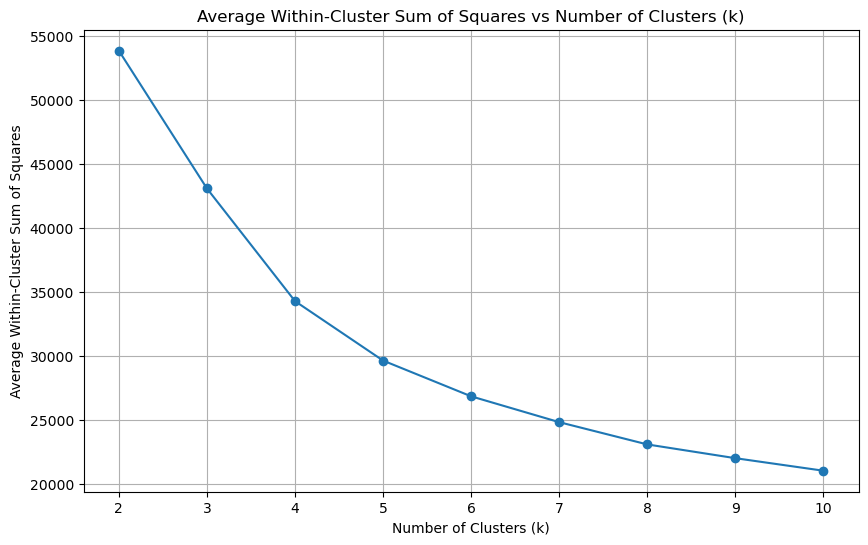

In [35]:
# Extracting k values and their corresponding scores for plotting
k_values = list(results.keys())
scores = list(results.values())

# Creating the plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores, marker='o')
plt.title("Average Within-Cluster Sum of Squares vs Number of Clusters (k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Average Within-Cluster Sum of Squares")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [57]:
segment_df_final_classic = segment_df_final.copy()

In [58]:
# Run k-means with k=4
kmeansModel = KMeans(n_clusters=4, n_init=50, max_iter=100)
kmeansModel.fit(X)
segment_df_final_classic['Cluster'] = kmeansModel.labels_

# Compute mean values for each cluster
segment_characteristics = segment_df_final_classic.groupby('Cluster').mean()
segment_characteristics

,IPr*pPr30,IPr*pPr10,IPr*pPr05,Iin*pIn0.5,Iin*pIn1,Iin*pIn3,ICp*pCp12,ICp*pCp20,ICp*pCp32,ICl*pClD,...,income,age,sports,gradschl,IPr,Iin,ICp,ICl,Icn,IBr
Cluster,,,,,,,,,,,,,,,,,,,,,
0,15.888889,82.460317,111.222222,10.873016,41.904762,76.111111,31.317460,50.063492,28.174603,38.650794,...,62.984127,50.000000,0.698413,0.619048,15.888889,10.873016,8.888889,38.650794,12.809524,12.857143
1,13.090909,66.690909,91.636364,16.981818,79.181818,118.872727,152.345455,202.909091,94.418182,11.109091,...,59.727273,45.145455,0.418182,0.181818,13.090909,16.981818,34.600000,11.109091,11.163636,13.018182
2,12.733333,68.288889,89.133333,11.244444,45.822222,78.711111,24.866667,52.600000,40.044444,11.644444,...,62.600000,46.866667,0.444444,0.288889,12.733333,11.244444,9.333333,11.644444,41.644444,13.533333
3,45.702703,250.263514,319.918919,8.520270,35.331081,59.641892,26.236486,46.675676,35.824324,12.601351,...,47.527027,42.216216,0.114865,0.283784,45.702703,8.520270,8.831081,12.601351,11.479730,12.851351


In [60]:
# Compute log-lifts for each variable in each segment using base 10 logarithm
log_lifts = segment_df_final_classic.copy()
for column in log_lifts.columns[:-1]:  # Exclude the 'Cluster' column
    overall_mean = log_lifts[column].mean()
    log_lifts[column] = log_lifts.groupby('Cluster')[column].transform(lambda x: np.log10(x.mean() / overall_mean))

# Compute the mean log-lift for each cluster
log_lifts = log_lifts.groupby('Cluster').mean()
log_lifts

,IPr*pPr30,IPr*pPr10,IPr*pPr05,Iin*pIn0.5,Iin*pIn1,Iin*pIn3,ICp*pCp12,ICp*pCp20,ICp*pCp32,ICl*pClD,...,income,age,sports,gradschl,IPr,Iin,ICp,ICl,Icn,IBr
Cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.263178,-0.280969,-0.263178,-0.000577,-0.039887,-0.000577,-0.197675,-0.180428,-0.205738,0.344719,...,0.058894,0.045913,0.319839,0.267451,-0.263178,-0.000577,-0.180606,0.344719,-0.098155,-0.004154
1,-0.347302,-0.373147,-0.347302,0.193058,0.236475,0.193058,0.489368,0.427352,0.319460,-0.196761,...,0.035835,0.001557,0.097092,-0.264636,-0.347302,0.193058,0.409622,-0.196761,-0.157882,0.001252
2,-0.359330,-0.362864,-0.359330,0.014011,-0.001074,0.014011,-0.297844,-0.158963,-0.053053,-0.176320,...,0.056237,0.017807,0.123545,-0.063542,-0.359330,0.014011,-0.159417,-0.176320,0.413869,0.018106
3,0.195670,0.201183,0.195670,-0.106473,-0.113993,-0.106473,-0.274555,-0.210859,-0.101417,-0.142022,...,-0.063397,-0.027578,-0.464086,-0.071285,0.195670,-0.106473,-0.183440,-0.142022,-0.145756,-0.004350


**Save the dataframe**

In [61]:
# Save segment_means DataFrame as CSV
segment_characteristics.to_csv('segment_characteristics_classical_final.csv', index=True)

# Save loglift_scores_without_overall_mean DataFrame as CSV
log_lifts.to_csv('log_lifts_classical_final.csv', index=True)

In [62]:
import numpy as np
import pandas as pd

# Assuming merged_df is your DataFrame
# Compute log-lifts for each variable in each segment using base 10 logarithm
log_lifts = merged_df.copy()
for column in log_lifts.columns[:-1]:  # Exclude the 'Cluster' column
    overall_mean = log_lifts[column].mean()
    log_lifts[column] = log_lifts.groupby('Cluster')[column].transform(lambda x: np.log10(x.mean() / overall_mean))

# Compute the mean log-lift for each cluster
log_lifts = log_lifts.groupby('Cluster').mean()

# Define thresholds
noteworthy_threshold = 0.04
very_noteworthy_threshold = 0.08

# Adjusted function to ensure that columns are not duplicated between noteworthy and very noteworthy categories
def find_distinct_noteworthy_columns(df):
    distinct_noteworthy_columns = {}
    for index, row in df.iterrows():
        # Noteworthy columns (greater than or equal to 0.04 and less than 0.08)
        noteworthy_cols = {col: row[col] for col in df.columns if noteworthy_threshold <= abs(row[col]) < very_noteworthy_threshold}
        # Very noteworthy columns (equal or greater than 0.08)
        very_noteworthy_cols = {col: row[col] for col in df.columns if abs(row[col]) >= very_noteworthy_threshold}
        distinct_noteworthy_columns[f'Segment {index + 1}'] = {'Noteworthy': noteworthy_cols, 'Very Noteworthy': very_noteworthy_cols}
    return distinct_noteworthy_columns

# Find distinct noteworthy and very noteworthy columns for each segment
distinct_noteworthy_columns_per_segment = find_distinct_noteworthy_columns(log_lifts)

# Print distinct noteworthy and very noteworthy columns with scores for each segment
for segment, columns in distinct_noteworthy_columns_per_segment.items():
    print(f"{segment}:")
    print("Noteworthy columns:")
    for col, score in columns['Noteworthy'].items():
        print(f"  {col}: {score}")
    print("Very noteworthy columns:")
    for col, score in columns['Very Noteworthy'].items():
        print(f"  {col}: {score}")
    print()

Segment 1:
Noteworthy columns:
  income: -0.06339665025189893
  gradschl: -0.07128537526899975
  pCp12: -0.05112223703597566
  pCp32: 0.04111701333278517
Very noteworthy columns:
  sports: -0.4640857442886263
  pBrA: -0.16684690830555607
  pBrC: 0.10482252119093598
  IPr: 0.1956699562106458
  Iin: -0.10647319356795469
  ICp: -0.18343976175387092
  ICl: -0.14202203864572685
  Icn: -0.14575648551440326

Segment 2:
Noteworthy columns:
  Cust: 0.04643306430648923
  income: 0.05889381519069405
  age: 0.04591267887102871
  pIn1: -0.04418760209510913
  pCp32: -0.060985927304456594
Very noteworthy columns:
  sports: 0.3198391767606629
  gradschl: 0.26745110730097466
  IPr: -0.26317839929436393
  ICp: -0.1806061563868391
  ICl: 0.34471925670159553
  Icn: -0.09815516372000276

Segment 3:
Noteworthy columns:
  Cust: -0.05212799578330881
  income: 0.05623703437256436
  gradschl: -0.0635421117404498
  pCp12: -0.06576130145370641
  pCp32: 0.05122873109663668
  pCnSp: 0.0680593273278013
  pBrB: -0.07

--End--